In [1]:
'''

读进evoked，进行组平均

一对一对先看一下。看下是否有明显差异波，然后再相减，统计。

'''

import os.path as op
import mne
from mne.preprocessing import ICA
from mne.event import define_target_events
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from mne.channels import combine_channels

#
# DD
sub_ids = [

     "pre4002_y","pre4004_y","pre4004_y","pre4005_y","pre4010_y","pre4012_y","pre4013_y"

]
# # 正常儿童
# sub_ids = [
#
#      "pre4003_y","pre4007_y","pre4008_y","pre4009_y","pre4011_y","pre4012_y","pre4013_y"
#
# ]


In [2]:
data_path = 'E:\实验\阅读困难\数据处理\pre4\data\\7evoked_equalization_oddball\\'
type_stim = ['std_BA','odd_TA','std_ta','odd_ba','std_t1ji','odd_t4ji','std_t4ji','odd_t1ji']
list_evoked_std_BA = list()
list_evoked_odd_TA = list()
list_evoked_std_ta = list()
list_evoked_odd_ba = list()
# sub_id = sub_ids[1]
for sub_id in sub_ids:
    num_type = 1
    fname = data_path + sub_id + '_'+ 'std_BA' +'-ave.fif'
    evoked1 = mne.read_evokeds(fname)[0]
    # evoked1.filter(l_freq=0.3, h_freq=30)
    list_evoked_std_BA.append(evoked1)

    num_type = 2
    fname = data_path + sub_id + '_'+'odd_TA'+'-ave.fif'
    evoked2 = mne.read_evokeds(fname)[0]
    # evoked2.filter(l_freq=0.3, h_freq=30)
    list_evoked_odd_TA.append(evoked2)

    #
    # num_type = 7
    # fname = data_path + sub_id + '_'+'std_ta'+'-ave.fif'
    # evoked3 = mne.read_evokeds(fname)[0]
    # # evoked3.filter(l_freq=0.3, h_freq=30)
    # list_evoked_std_ta.append(evoked3)
    #
    # num_type = 8
    # fname = data_path + sub_id + '_'+'odd_ba'+'-ave.fif'
    # evoked4 = mne.read_evokeds(fname)[0]
    # # evoked4.filter(l_freq=0.3, h_freq=30)
    # list_evoked_odd_ba.append(evoked4)

# list_evoked_std = list_evoked_std_BA+list_evoked_std_ta
# list_evoked_odd = list_evoked_odd_TA+list_evoked_odd_ba
list_evoked_std = list_evoked_std_BA
list_evoked_odd = list_evoked_odd_TA

grand_average_std = mne.grand_average(list_evoked_std)
grand_average_odd = mne.grand_average(list_evoked_odd)
grand_average_all = list()
grand_average_std.comment = 'STD'
grand_average_odd.comment = 'ODD'

grand_average_all = [grand_average_std,grand_average_odd]


Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4002_y_std_BA-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (1)
        0 CTF compensation matrices available
        nave = 46 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4002_y_odd_TA-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (2)
        0 CTF compensation matrices available
        nave = 46 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.5, 0] sec)
Reading E:\实验\阅读困难\数据处理\pre4\data\7evoked_equalization_oddball\pre4004_y_std_BA-ave.fif ...
    Found the data of interest:
        t =    -500.00 ...    1000.00 ms (1)
        0 CTF compensatio

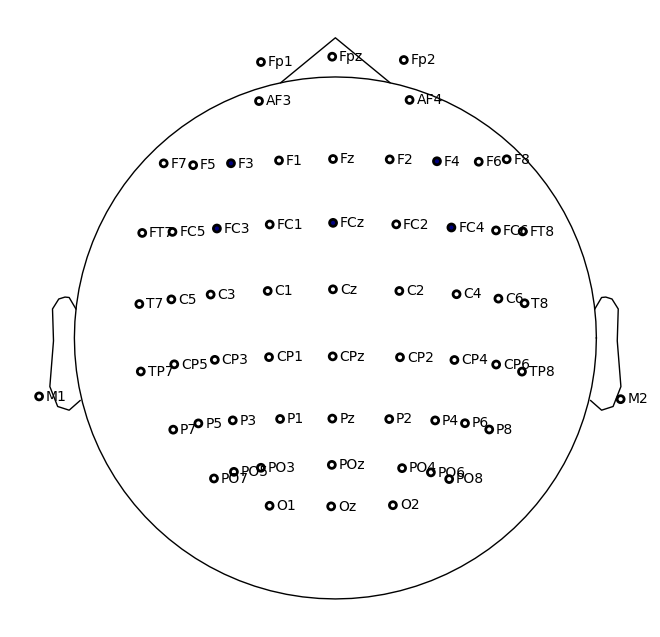

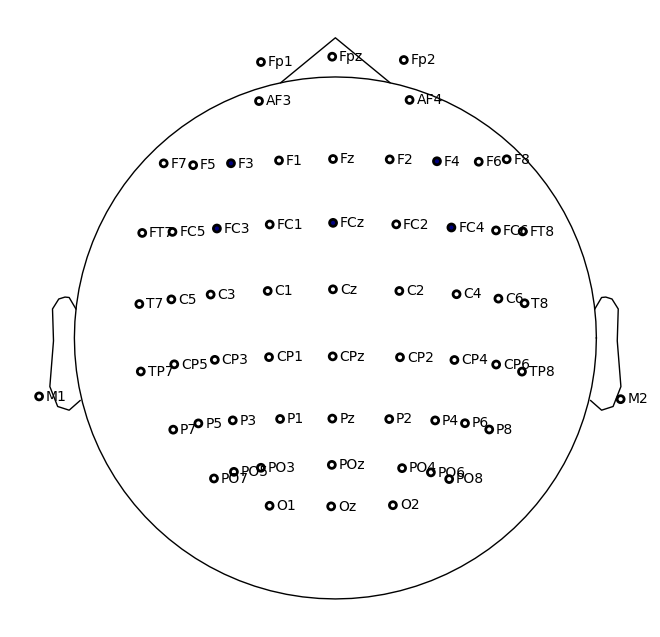

In [3]:
import numpy as np

a = [[7, 11, 18, 16, 20]]

b = np.array(a)
evoked1.plot_sensors(show_names=True, ch_groups=a)

In [4]:
%matplotlib inline
# 看一眼都是哪些sensors

# 选一组电极合为一个
groups=dict(Left=[7, 11, 18, 16, 20], )
roi_evoked_std = combine_channels(grand_average_std, groups=groups)
roi_evoked_odd = combine_channels(grand_average_odd, groups=groups)

#造一个差异波Evoked
roi_evoked_oddvsstd = roi_evoked_odd.copy()
roi_evoked_oddvsstd.data = roi_evoked_oddvsstd.data-roi_evoked_std.data

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [5]:
%matplotlib qt

ROI_grand_average_all = [roi_evoked_std,roi_evoked_odd,roi_evoked_oddvsstd]
from mne.viz import plot_evoked_topo, plot_compare_evokeds
plot_compare_evokeds(ROI_grand_average_all)

C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_21844\2237625939.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  plot_compare_evokeds(ROI_grand_average_all)


[<Figure size 800x600 with 1 Axes>]

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


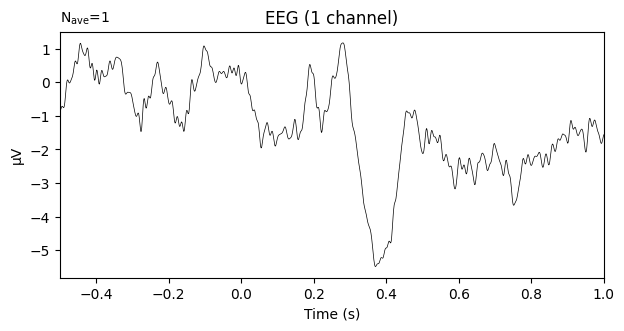

In [6]:
roi_evoked_std.plot()

roi_evoked_odd.plot()

Need more than one channel to make topography for eeg. Disabling interactivity.


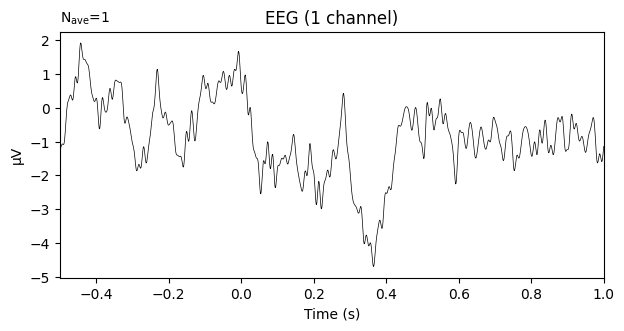

In [7]:
roi_evoked_oddvsstd.plot()

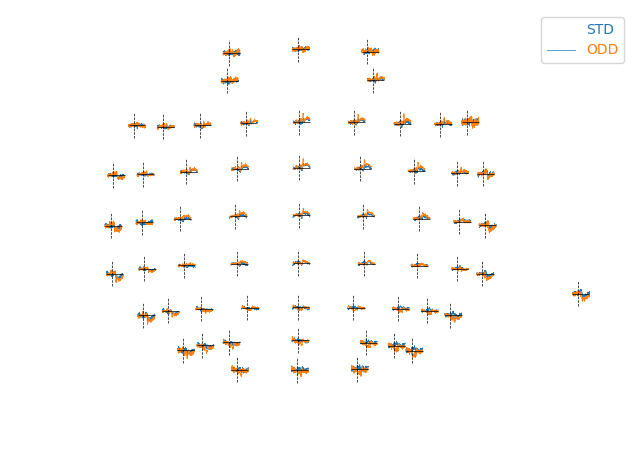

In [8]:

%matplotlib qt

title = 'MNE sample data\nleft vs right (A/V combined)'
from mne.viz import plot_evoked_topo
plot_evoked_topo(grand_average_all, ylim = dict(eeg=[10, -10]))


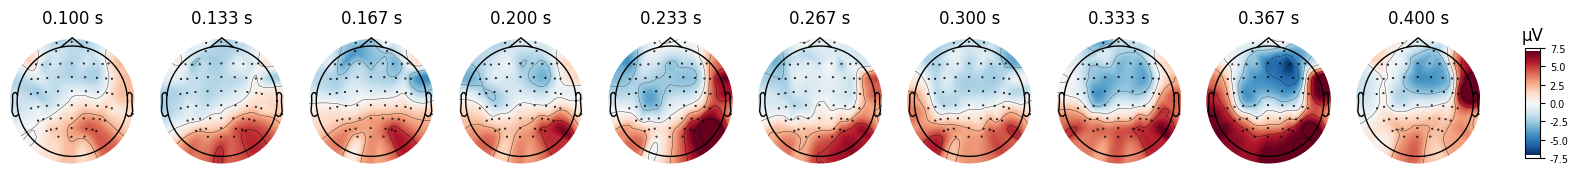

In [9]:

times = np.linspace(0.1, 0.4, 10)
grand_average_odd_std = grand_average_std
data_grand_average_odd_std = grand_average_odd.data - grand_average_std.data
grand_average_odd_std.data = data_grand_average_odd_std
grand_average_odd_std.plot_topomap(ch_type='eeg', times=times, colorbar=True)

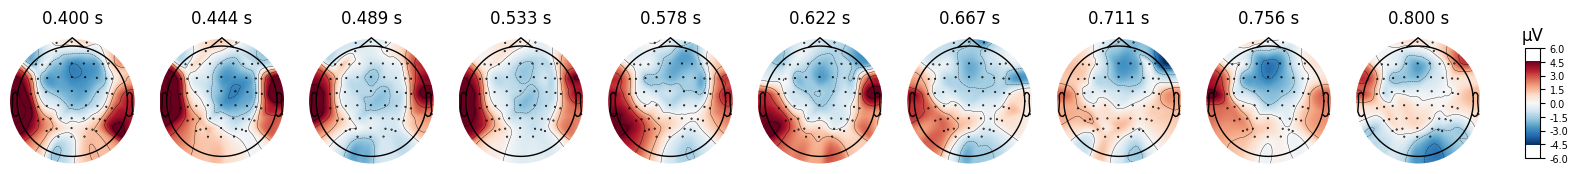

In [10]:
times = np.linspace(0.4, 0.8, 10)
grand_average_odd_std = grand_average_std
data_grand_average_odd_std = grand_average_odd.data - grand_average_std.data
grand_average_odd_std.data = data_grand_average_odd_std
grand_average_odd_std.plot_topomap(ch_type='eeg', times=times, colorbar=True)